# Group Work Submission 2
Comparing 3 asset classes during COVID

* Select a gold Exchange Traded Fund: GLD SPDR Gold Shares [NYSE],  
* Select an equity ETF from outside the US: EXS1 Shares Core DAX UCITS ETF (DE), 
* Select bitcoin BTC-USD (CoinMarketCap. Currency in USD).

In [1]:
import quandl
import pandas as pd
import pandas_datareader.data as reader
import datetime as dt
import statsmodels.api as sm
import yfinance as yf
from pandas_datareader import data as pdr
import numpy as np
from numpy import mean
from numpy import cov
import statistics
import matplotlib as plt
import matplotlib.pyplot as plt
import mplfinance as mpf
from matplotlib import rcParams
import statsmodels
from scipy import stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from arch import arch_model
import statsmodels.tsa.stattools as sts
from arch.unitroot import engle_granger
from random import gauss
from statsmodels.tsa.vector_ar.vecm import VECM
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import warnings
warnings.filterwarnings('ignore')

# Data Importing

Import closing prices for the entire year of 2020 for  your GOLD ETF, your equity ETF, and bitcoin.
* Import your gold ETF prices for the months of April 2020 through Dec 2020. 
* Import your equity ETF prices for the months of April 2020 through Dec 2020.
* Import your bitcoin prices for the months of April 2020 through Dec 2020.

In [2]:
GoldETF = pdr.get_data_yahoo("GLD", start="2020-04-01", end="2020-12-31")
#NYSE was closed on Thursday, 26 November & 25 Maj
#Saved the data in csv
#GoldETF.to_csv("GLD.csv")

In [3]:
StockETF = pdr.get_data_yahoo("EXS1.DE", start="2020-04-01", end="2020-12-31")
#Dax was closed on Apr 13, 2020, Apr 10, 2020, May 01, 2020, Jun 01, 2020, Dec 24-25, 2020, Dec 31, 2020
#Saved the data in csv
#StockETF.to_csv("StockETF.csv")

In [4]:
BTC = pdr.get_data_yahoo("BTC-USD", start="2020-04-02", end="2020-12-30")
#If I import from 2020-04-01 to 2020-12-31, it includes 31st of March and 1st of Jan
#Saved the data in csv
#BTC.to_csv("BTC.csv")

# Data Processing

Compute the daily returns of your Gold ETF, your Equity ETF, and bitcoin of April 2020 through Dec 2020

In [5]:
GoldETFreturn = np.log(GoldETF['Adj Close']) - np.log(GoldETF['Adj Close'].shift(1))
StockETFreturn = np.log(StockETF['Adj Close']) - np.log(StockETF['Adj Close'].shift(1))
BTCFreturn = np.log(BTC['Adj Close']) - np.log(BTC['Adj Close'].shift(1))

In [6]:
GoldETFreturn #Gold returns

Date
2020-04-01         NaN
2020-04-02    0.016261
2020-04-03    0.004925
2020-04-06    0.027334
2020-04-07   -0.005369
                ...   
2020-12-24    0.003977
2020-12-28   -0.003636
2020-12-29    0.003636
2020-12-30    0.007626
2020-12-31    0.003707
Name: Adj Close, Length: 191, dtype: float64

In [7]:
StockETFreturn #ESX1 returns

Date
2020-04-01         NaN
2020-04-02    0.003665
2020-04-03   -0.006238
2020-04-06    0.055951
2020-04-07    0.028367
                ...   
2020-12-22    0.010916
2020-12-23    0.013393
2020-12-28    0.014408
2020-12-29   -0.001875
2020-12-30   -0.002734
Name: Adj Close, Length: 190, dtype: float64

In [8]:
BTCFreturn #BTC returns

Date
2020-04-01         NaN
2020-04-02   -0.008906
2020-04-03    0.019726
2020-04-04   -0.011187
2020-04-05    0.068384
                ...   
2020-12-27   -0.006251
2020-12-28    0.030458
2020-12-29    0.010198
2020-12-30    0.052625
2020-12-31    0.005559
Name: Adj Close, Length: 270, dtype: float64

# Data Summaries


In [9]:
GoldETFMA = pdr.get_data_yahoo("GLD", start="2020-03-01", end="2020-12-31")
StockETFMA = pdr.get_data_yahoo("EXS1.DE", start="2020-03-01", end="2020-12-31")
BTCMA = pdr.get_data_yahoo("BTC-USD", start="2020-03-01", end="2020-12-30")

Compute a 20-day moving average price of your GOLD ETF.  The moving average price on 1 April 2020 should include data from March.

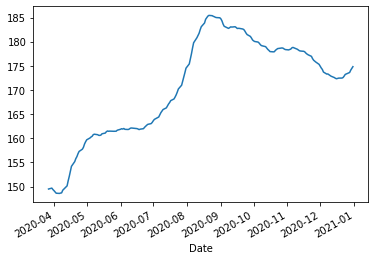

In [10]:
Gold20MA = GoldETFMA['Adj Close'].rolling(20).mean()
Gold20MA.plot()
plt.show()

Compute a 20-day moving average price of your equity ETF.  The moving average price on 1 April 2020 should include data from March.

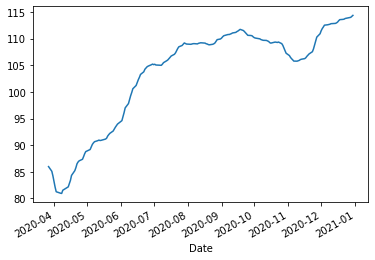

In [11]:
Stcok20MA = StockETFMA['Adj Close'].rolling(20).mean()
Stcok20MA.plot()
plt.show()

Compute a 20-day moving average price of bitcoin.  The moving average price on 1 April 2020 should include data from March.

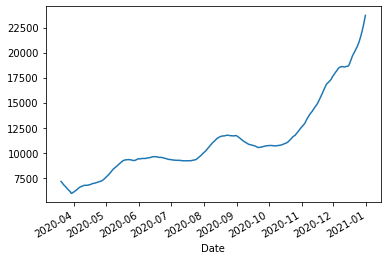

In [12]:
BTC20MA = BTCMA['Adj Close'].rolling(20).mean()
BTC20MA.plot()
plt.show()

# Graphing

Graph each price series along with its moving average from April 2020 through Dec 2020

GoldETF Price & MA Chart

* In April, the price moves above the 20 day MA.
* From Maj, prices moves around (above & below) the 20 day MA, which is a straith line until July. Shows that price move sideways
* During the second half of the summer price moves above the 20 day MA, by end of summer priced extends way above 20 day MA
* In Sept, the price goes under the 20 day MA, and stay under it most of the time during the rest of the year. Shows price slowly trending downwards. 

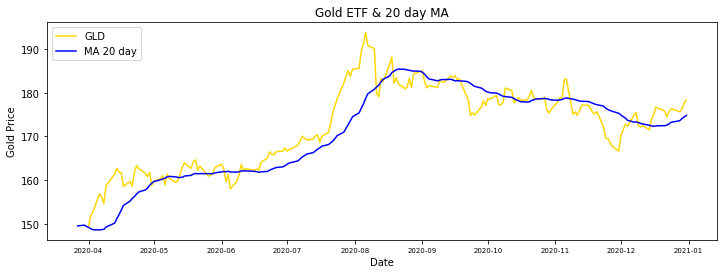

In [13]:
plt.figure(figsize=(12,4))
plt.plot(GoldETF['Adj Close'], label='GLD', color='gold')
plt.plot(Gold20MA, label='MA 20 day', color='b')
plt.title('Gold ETF & 20 day MA')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend(loc=2)
plt.tick_params(axis='x', labelsize=7)

StockETF Price & MA Chart

* In April, the price moves above the 20 day MA, and stays above it most of the time during Q2 & Q3. Shows price treding upwards.

* In Sept, the price goes under the 20 day MA, and stay under it till November. In Q2 & Q3 20 day MA doesn`t change much. Shows price moves sideways. 
* In November price raises above the 20 day MA again, and stay above it till end of December. 

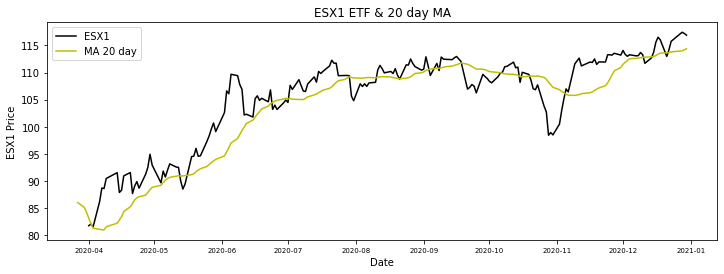

In [14]:
plt.figure(figsize=(12,4))
plt.plot(StockETF['Adj Close'], label='ESX1', color='black')
plt.plot(Stcok20MA, label='MA 20 day', color='y')
plt.title('ESX1 ETF & 20 day MA')
plt.xlabel('Date')
plt.ylabel('ESX1 Price')
plt.legend(loc=2)
plt.tick_params(axis='x', labelsize=7)

BTC Price & MA Chart

* During Q2 & Q3, the price and the 20 day MA move in line with each other. Although they both increase slightly.
* In October, price raises above the 20 day MA, and stay above it most of the time till end of December. Price extends way above the 20 day MA. Shows strong trend. 

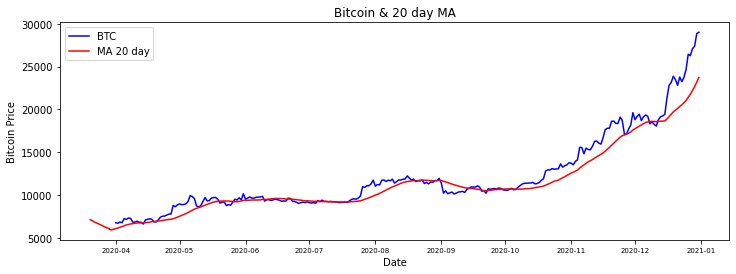

In [15]:
plt.figure(figsize=(12,4))
plt.plot(BTC['Adj Close'], label='BTC', color='b')
plt.plot(BTC20MA, label='MA 20 day', color='r')
plt.title('Bitcoin & 20 day MA')
plt.xlabel('Date')
plt.ylabel('Bitcoin Price')
plt.legend(loc=2)
plt.tick_params(axis='x', labelsize=7)

Graph gold and equity prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend

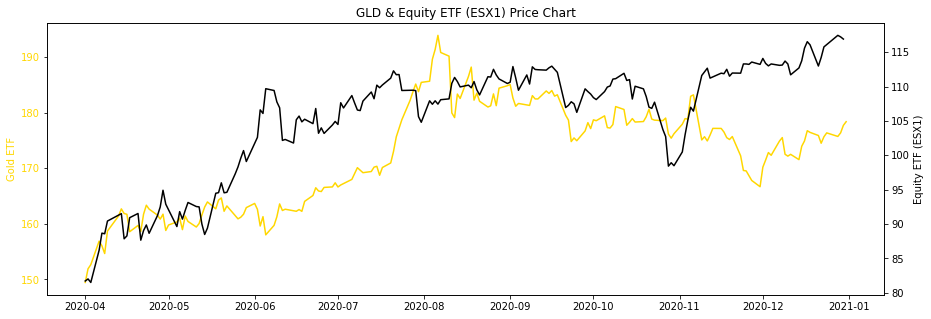

In [16]:
left_data = GoldETF['Adj Close']
right_data = StockETF['Adj Close']

fig, ax_left = plt.subplots(figsize=(15,5))
ax_right = ax_left.twinx()

ax_left.plot(left_data, color='gold',)
ax_right.plot(right_data, color='black')
ax_left.set_ylabel('Gold ETF', color='gold')
ax_right.set_ylabel('Equity ETF (ESX1)', color='black')
plt.title('GLD & Equity ETF (ESX1) Price Chart')
for tl in ax_left.get_yticklabels():
    tl.set_color('gold')

Graph gold and bitcoin prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend

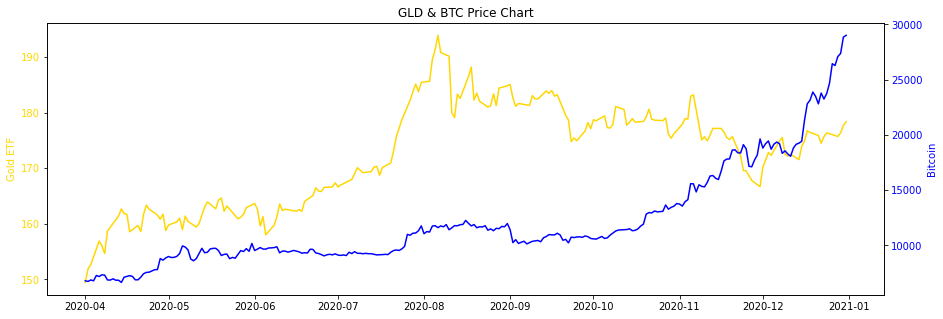

In [17]:
left_data = GoldETF['Adj Close']
right_data = BTC['Adj Close']

fig, ax_left = plt.subplots(figsize=(15,5))
ax_right = ax_left.twinx()

ax_left.plot(left_data, color='gold')
ax_right.plot(right_data, color='blue')
ax_left.set_ylabel('Gold ETF', color='gold')
ax_right.set_ylabel('Bitcoin', color='blue')
plt.title('GLD & BTC Price Chart')
for tl in ax_left.get_yticklabels():
    tl.set_color('gold')
for tl in ax_right.get_yticklabels():
    tl.set_color('b')

Graph equity and bitcoin prices on the same plot.  Use a separate scale for each series, and be sure to add a label and legend

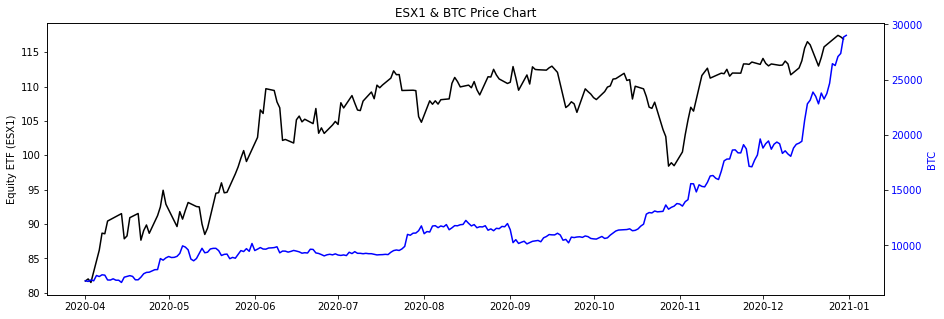

In [18]:
left_data = StockETF['Adj Close']
right_data = BTC['Adj Close']

fig, ax_left = plt.subplots(figsize=(15,5))
ax_right = ax_left.twinx()

ax_left.plot(left_data, color='black', )
ax_right.plot(right_data, color='blue')
ax_left.set_ylabel('Equity ETF (ESX1)', color='black')
ax_right.set_ylabel('BTC', color='blue')
plt.title('ESX1 & BTC Price Chart')
for tl in ax_right.get_yticklabels():
    tl.set_color('b')

# Fitting a GARCH Model

Pick one of the 3 series (gold, equity, or bitcoin).  

Fit a GARCH model for Q2.  Fit a GARCH model for Q3.  Fit a GARCH model for Q4.



* Picked Gold GLD ETF

In [19]:
GOLDETFreturn = GoldETFreturn.dropna() #Remove NA
Q2GoldReturn = GOLDETFreturn.iloc[0: 62] #Q2 data
Q3GoldQReturn = GOLDETFreturn.iloc[62: 126] #Q3 data
Q4GoldReturn = GOLDETFreturn.iloc[126: 190] #Q4 data

In [20]:
#plot_acf(Q2GoldReturn) #The ACF and PACF plots can then be interpreted to estimate values for p and q

In [21]:
#plot_pacf(Q2GoldReturn)

GARCH model for Q2

In [22]:
Q2Goldgarch = arch_model(Q2GoldReturn, vol = "GARCH", mean = "Constant", dist = "Normal", p = 1, q = 1)
Q2Goldgarchresult = Q2Goldgarch.fit()
Q2Goldgarchresult.summary()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1.4125036769162028e+16
Iteration:      2,   Func. Count:     17,   Neg. LLF: 21241012324679.004
Iteration:      3,   Func. Count:     28,   Neg. LLF: -197.17885741778028
Optimization terminated successfully    (Exit mode 0)
            Current function value: -197.17885784555574
            Iterations: 7
            Function evaluations: 28
            Gradient evaluations: 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                197.179
Distribution:                  Normal   AIC:                          -386.358
Method:            Maximum Likelihood   BIC:                          -377.849
                                        No. Observations:                   62
Date:                Mon, Apr 12 2021   Df Residuals:                       61
Time:                        12:41:02   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.4421e-03  1.258e-03      1.146      0.252 [-1.024e-03,3.908e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      1.0523e-05  5.865e-09   1794.178      0.000 [1.051e-05,1.053e-05]
alpha[1]       0.0500      0.352      0.142      0.887     [ -0.639,  0.739]
beta[1]        0.8500      0.281      3.028  2.462e-03     [  0.300,  1.400]
============================================================================

Covariance estimator: robust
"""

GARCH model for Q3

In [23]:
Q3Goldgarch = arch_model(Q3GoldQReturn, vol = "GARCH", p = 2, q = 2, mean = "Constant", dist = "Normal")
Q3Goldgarchresult = Q3Goldgarch.fit()
Q3Goldgarchresult.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 11287377.5112761
Iteration:      2,   Func. Count:     21,   Neg. LLF: 1828.5345785374016
Iteration:      3,   Func. Count:     32,   Neg. LLF: 141764.37156536026
Iteration:      4,   Func. Count:     40,   Neg. LLF: 1148.4280948715923
Iteration:      5,   Func. Count:     51,   Neg. LLF: -70.53092334780467
Iteration:      6,   Func. Count:     60,   Neg. LLF: 24041621.328520957
Iteration:      7,   Func. Count:     72,   Neg. LLF: -194.11609445071392
Optimization terminated successfully    (Exit mode 0)
            Current function value: -194.11609447778363
            Iterations: 11
            Function evaluations: 72
            Gradient evaluations: 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                194.116
Distribution:                  Normal   AIC:                          -376.232
Method:            Maximum Likelihood   BIC:                          -363.279
                                        No. Observations:                   64
Date:                Mon, Apr 12 2021   Df Residuals:                       63
Time:                        12:41:02   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         1.1962e-03  1.371e-03      0.873      0.383 [-1.490e-03,3.883e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.1641e-05  1.437e-05      2.898  3.751e-03 [1.348e-05,6.980e-05]
alpha[1]       0.0891  9.319e-02      0.956      0.339  [-9.360e-02,  0.272]
alpha[2]       0.1985      0.240      0.828      0.408     [ -0.272,  0.669]
beta[1]        0.2226      0.318      0.701      0.483     [ -0.400,  0.845]
beta[2]        0.2226      0.296      0.753      0.451     [ -0.357,  0.802]
============================================================================

Covariance estimator: robust
"""

GARCH model for Q4

In [24]:
Q4Goldgarch = arch_model(Q4GoldReturn, vol = "GARCH", p = 2, q = 2, mean = "Constant", dist = "Normal")
Q4Goldgarchresult = Q4Goldgarch.fit()
Q4Goldgarchresult.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 29085558.59592988
Iteration:      2,   Func. Count:     21,   Neg. LLF: -174.34197548253155
Iteration:      3,   Func. Count:     31,   Neg. LLF: 578392.8318329575
Iteration:      4,   Func. Count:     44,   Neg. LLF: -109.33088949209267
Iteration:      5,   Func. Count:     53,   Neg. LLF: 77136070.05481845
Iteration:      6,   Func. Count:     66,   Neg. LLF: 43.91307376043022
Iteration:      7,   Func. Count:     74,   Neg. LLF: -188.53271217768963
Iteration:      8,   Func. Count:     83,   Neg. LLF: 327567098.3713394
Iteration:      9,   Func. Count:     96,   Neg. LLF: 26656440.62744944
Iteration:     10,   Func. Count:    108,   Neg. LLF: -204.2818502486516
Optimization terminated successfully    (Exit mode 0)
            Current function value: -204.28185037107932
            Iterations: 14
            Function evaluations: 108
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                204.282
Distribution:                  Normal   AIC:                          -396.564
Method:            Maximum Likelihood   BIC:                          -383.610
                                        No. Observations:                   64
Date:                Mon, Apr 12 2021   Df Residuals:                       63
Time:                        12:41:02   Df Model:                            1
                                  Mean Model                                  
==============================================================================
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -4.8025e-05  1.064e-03 -4.515e-02      0.964 [-2.133e-03,2.037e-03]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      5.6110e-05  3.064e-05      1.831  6.707e-02 [-3.945e-06,1.162e-04]
alpha[1]       0.0849      0.618      0.138      0.891      [ -1.125,  1.295]
alpha[2]       0.2357      0.272      0.868      0.386      [ -0.297,  0.768]
beta[1]        0.1274      1.362  9.350e-02      0.926      [ -2.543,  2.798]
beta[2]        0.1274      0.845      0.151      0.880      [ -1.529,  1.784]
=============================================================================

Covariance estimator: robust
"""

Repeat the process, but instead using GARCH-M Model. 

We included the R code below and Results from R, as python does not feature GARCH-M. Please disregard SyntaxError.

GARCH-M model for Q2

In [25]:
#library(quantmod)
#gld1q <- getSymbols("GLD",from ="2020-04-01", to = "2020-06-30",auto.assign = FALSE)
#gld1q <- gld1q$GLD.Close 
#gld2q <- getSymbols("GLD",from ="2020-07-01", to = "2020-09-30",auto.assign = FALSE)
#gld2q <- gld2q$GLD.Close
#gld3q <- getSymbols("GLD",from ="2020-10-01", to = "2020-12-31",auto.assign = FALSE)
#gld3q <- gld3q$GLD.Close


#library(rugarch)
#m1q = ugarchspec(variance.model=list(model="sGARCH", garchOrder=c(1,1)), 
#mean.model=list(armaOrder=c(0,0),include.mean=TRUE,archm=TRUE,archpow=2), distribution.model="norm")
#fit1q <- ugarchfit(m1q,gld1q)
#fit1q


In [26]:

*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu     164.72819    0.475172 346.67044  0.00000
archm   -0.65151    0.045251 -14.39769  0.00000
omega    0.74376    0.767378   0.96923  0.33243
alpha1   0.00000    0.127364   0.00000  1.00000
beta1    0.80522    0.046863  17.18237  0.00000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu     164.72819     0.81453 202.23828 0.000000
archm   -0.65151     0.46086  -1.41369 0.157454
omega    0.74376     3.15900   0.23544 0.813865
alpha1   0.00000     0.51969   0.00000 1.000000
beta1    0.80522     0.30825   2.61219 0.008996

LogLikelihood : -134.6622 

Information Criteria
------------------------------------
                   
Akaike       4.5052
Bayes        4.6768
Shibata      4.4935
Hannan-Quinn 4.5726

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
                        statistic   p-value
Lag[1]                      30.32 3.665e-08
Lag[2*(p+q)+(p+q)-1][2]     37.89 9.116e-11
Lag[4*(p+q)+(p+q)-1][5]     45.76 1.041e-12
d.o.f=0
H0 : No serial correlation

Weighted Ljung-Box Test on Standardized Squared Residuals
------------------------------------
                        statistic   p-value
Lag[1]                      16.71 4.347e-05
Lag[2*(p+q)+(p+q)-1][5]     27.80 1.310e-07
Lag[4*(p+q)+(p+q)-1][9]     31.90 1.314e-07
d.o.f=2

Weighted ARCH LM Tests
------------------------------------
            Statistic Shape Scale P-Value
ARCH Lag[3]     4.565 0.500 2.000 0.03263
ARCH Lag[5]     5.959 1.440 1.667 0.06141
ARCH Lag[7]     7.262 2.315 1.543 0.07623

Nyblom stability test
------------------------------------
Joint Statistic:  2.4802
Individual Statistics:             
mu     1.2858
archm  1.0258
omega  0.4353
alpha1 0.3947
beta1  0.2955

Asymptotic Critical Values (10% 5% 1%)
Joint Statistic:     	 1.28 1.47 1.88
Individual Statistic:	 0.35 0.47 0.75

Sign Bias Test
------------------------------------
                   t-value      prob sig
Sign Bias            2.587 1.225e-02  **
Negative Sign Bias   0.205 8.383e-01    
Positive Sign Bias   6.116 9.267e-08 ***
Joint Effect        38.759 1.952e-08 ***


Adjusted Pearson Goodness-of-Fit Test:
------------------------------------
  group statistic p-value(g-1)
1    20     11.55       0.9040
2    30     26.06       0.6220
3    40     38.65       0.4859
4    50     50.90       0.3986

SyntaxError: invalid syntax (<ipython-input-26-243f5213803b>, line 1)

GARCH-M model for Q3

In [ ]:
#m2q = ugarchspec(variance.model=list(model="sGARCH", garchOrder=c(1,1)),
#mean.model=list(armaOrder=c(1,0),include.mean=TRUE,archm=TRUE,archpow=2), distribution.model="norm")
#fit2q <- ugarchfit(m2q,gld2q)
#fit2q

In [ ]:
*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(1,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error   t value Pr(>|t|)
mu     165.09794    1.019189  161.9896 0.000000
ar1      1.00000    0.000179 5575.0783 0.000000
archm    0.29202    0.125703    2.3231 0.020173
omega    1.50711    0.182070    8.2777 0.000000
alpha1   0.51239    0.210484    2.4343 0.014919
beta1    0.26735    0.010004   26.7233 0.000000

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu     165.09794    1.782823   92.6048 0.000000
ar1      1.00000    0.000214 4667.7377 0.000000
archm    0.29202    0.120563    2.4222 0.015428
omega    1.50711    0.485346    3.1052 0.001901
alpha1   0.51239    0.203066    2.5233 0.011627
beta1    0.26735    0.006055   44.1497 0.000000

LogLikelihood : -136.6883 

Information Criteria
------------------------------------
                   
Akaike       4.5298
Bayes        4.7339
Shibata      4.5137
Hannan-Quinn 4.6101

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
                        statistic  p-value
Lag[1]                     0.4158 0.519051
Lag[2*(p+q)+(p+q)-1][2]    3.3337 0.017899
Lag[4*(p+q)+(p+q)-1][5]    8.4898 0.004808
d.o.f=1
H0 : No serial correlation

Weighted Ljung-Box Test on Standardized Squared Residuals
------------------------------------
                        statistic p-value
Lag[1]                     0.6953  0.4044
Lag[2*(p+q)+(p+q)-1][5]    3.3653  0.3444
Lag[4*(p+q)+(p+q)-1][9]    4.8228  0.4559
d.o.f=2

Weighted ARCH LM Tests
------------------------------------
            Statistic Shape Scale P-Value
ARCH Lag[3]    0.9551 0.500 2.000  0.3284
ARCH Lag[5]    1.7959 1.440 1.667  0.5181
ARCH Lag[7]    2.4886 2.315 1.543  0.6148

Nyblom stability test
------------------------------------
Joint Statistic:  0.6534
Individual Statistics:               
mu     0.007898
ar1    0.015667
archm  0.033195
omega  0.144659
alpha1 0.051044
beta1  0.016744

Asymptotic Critical Values (10% 5% 1%)
Joint Statistic:     	 1.49 1.68 2.12
Individual Statistic:	 0.35 0.47 0.75

Sign Bias Test
------------------------------------
                   t-value   prob sig
Sign Bias           1.6577 0.1028    
Negative Sign Bias  0.6087 0.5451    
Positive Sign Bias  1.4832 0.1434    
Joint Effect        3.3741 0.3375    


Adjusted Pearson Goodness-of-Fit Test:
------------------------------------
  group statistic p-value(g-1)
1    20     45.89    0.0005139
2    30     52.71    0.0045330
3    40     72.24    0.0009542
4    50     79.06    0.0041759


GARCH-M model for Q4

In [ ]:
#m3q = ugarchspec(variance.model=list(model="sGARCH", garchOrder=c(2,2)),
#mean.model=list(armaOrder=c(0,0),include.mean=TRUE,archm=TRUE,archpow=2), distribution.model="norm")
#fit3q <- ugarchfit(m3q,gld3q)
#fit3q

In [ ]:
*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
        Estimate  Std. Error  t value Pr(>|t|)
mu     179.00976    0.342740 522.2900 0.000000
archm   -0.17956    0.037964  -4.7299 0.000002
omega    1.15536    1.071773   1.0780 0.281036
alpha1   0.58880    0.263028   2.2385 0.025185
beta1    0.41020    0.305840   1.3412 0.179849

Robust Standard Errors:
        Estimate  Std. Error   t value Pr(>|t|)
mu     179.00976    0.505630 354.03279 0.000000
archm   -0.17956    0.028904  -6.21243 0.000000
omega    1.15536    1.612482   0.71651 0.473674
alpha1   0.58880    0.312544   1.88390 0.059579
beta1    0.41020    0.467300   0.87780 0.380050

LogLikelihood : -147.6999 

Information Criteria
------------------------------------
                   
Akaike       4.8476
Bayes        5.0177
Shibata      4.8362
Hannan-Quinn 4.9145

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
                        statistic   p-value
Lag[1]                      23.76 1.092e-06
Lag[2*(p+q)+(p+q)-1][2]     28.19 3.171e-08
Lag[4*(p+q)+(p+q)-1][5]     36.35 5.034e-10
d.o.f=0
H0 : No serial correlation

Weighted Ljung-Box Test on Standardized Squared Residuals
------------------------------------
                        statistic p-value
Lag[1]                      1.037  0.3086
Lag[2*(p+q)+(p+q)-1][5]     2.928  0.4204
Lag[4*(p+q)+(p+q)-1][9]     3.575  0.6615
d.o.f=2

Weighted ARCH LM Tests
------------------------------------
            Statistic Shape Scale P-Value
ARCH Lag[3]    0.1207 0.500 2.000  0.7283
ARCH Lag[5]    0.6256 1.440 1.667  0.8460
ARCH Lag[7]    0.8762 2.315 1.543  0.9328

Nyblom stability test
------------------------------------
Joint Statistic:  3.252
Individual Statistics:             
mu     0.9625
archm  2.2704
omega  0.3101
alpha1 1.2307
beta1  0.8536

Asymptotic Critical Values (10% 5% 1%)
Joint Statistic:     	 1.28 1.47 1.88
Individual Statistic:	 0.35 0.47 0.75

Sign Bias Test
------------------------------------
                   t-value   prob sig
Sign Bias           0.8454 0.4014    
Negative Sign Bias  0.2067 0.8370    
Positive Sign Bias  0.6785 0.5002    
Joint Effect        0.8009 0.8493    


Adjusted Pearson Goodness-of-Fit Test:
------------------------------------
  group statistic p-value(g-1)
1    20     30.65      0.04408
2    30     39.38      0.09458
3    40     51.92      0.08067
4    50     63.19      0.08372


Repeat the process one more time, using another variation of GARCH (e.g. Threshold GARCH, Exponential GARCH, Integrated GARCH)
* Picked EGARCH as this works better for stocks.

EGARCH model for Q2

In [ ]:
FitQ2GoldReturn = Q2GoldReturn*100 #Multiplied by 100, in avoid error, because vaules are close to 0, thus model fails.
Q2GoldEgarch = arch_model(FitQ2GoldReturn, vol = "EGARCH", p = 1, q = 1, mean = "constant", dist = "Normal")
Q2GoldgEarchresult = Q2GoldEgarch.fit()
Q2GoldgEarchresult.summary()

EGARCH model for Q3

In [ ]:
Q3GoldEgarch = arch_model(Q3GoldQReturn, vol = "EGARCH", p = 2, q = 2, mean = "constant", dist = "Normal")
Q3GoldEgarchresult = Q3GoldEgarch.fit()
Q3GoldEgarchresult.summary()

EGARCH model for Q4

In [ ]:
Q4GoldEgarch = arch_model(Q4GoldReturn, vol = "EGARCH", p = 2, q = 2, mean = "constant", dist = "Normal")
Q4GoldEgarchresult = Q4GoldEgarch.fit()
Q4GoldEgarchresult.summary()

What are the 3 long-term variances indicated by the models?

For a GARCH(1,1), long-run variance = ω/(1−α−β).

We run all the 3 types of GARCH(1,1) models for the whole period.

* Constant mean model: -0.886285462
* GARCH-M: 1.080886
* EGARCH: 12.2234763

In [ ]:
Totalgarch = arch_model(GOLDETFreturn, vol = "GARCH", p = 1, q = 1, mean = "Constant", dist = "Normal")
Totalgarchresult = Totalgarch.fit()
Totalgarchresult.summary()

In [ ]:
#We ran GARCH-M model in R. Please see the code and Results below.

#GTotal = ugarchspec(variance.model=list(model="sGARCH", garchOrder=c(1,1)),
#mean.model=list(armaOrder=c(0,0),include.mean=TRUE,archm=TRUE,archpow=2), distribution.model="norm")
#fitGTotal <- ugarchfit(GTotal,totalperiod)
#fitGTotal

In [ ]:
*---------------------------------*
*          GARCH Model Fit        *
*---------------------------------*

Conditional Variance Dynamics 	
-----------------------------------
GARCH Model	: sGARCH(1,1)
Mean Model	: ARFIMA(0,0,0)
Distribution	: norm 

Optimal Parameters
------------------------------------
         Estimate  Std. Error    t value Pr(>|t|)
mu     177.058534    0.049696 3562.82487 0.000000
archm   -0.017670    0.000327  -53.96911 0.000000
omega    2.067061    0.725360    2.84970 0.004376
alpha1   0.973164    0.138657    7.01849 0.000000
beta1    0.013011    0.082929    0.15689 0.875332

Robust Standard Errors:
         Estimate  Std. Error    t value Pr(>|t|)
mu     177.058534    0.049891 3548.87597  0.00000
archm   -0.017670    0.001350  -13.09280  0.00000
omega    2.067061    0.652676    3.16706  0.00154
alpha1   0.973164    0.111263    8.74648  0.00000
beta1    0.013011    0.059485    0.21872  0.82687

LogLikelihood : -611.3695 

Information Criteria
------------------------------------
                   
Akaike       6.4881
Bayes        6.5735
Shibata      6.4868
Hannan-Quinn 6.5227

Weighted Ljung-Box Test on Standardized Residuals
------------------------------------
                        statistic p-value
Lag[1]                      130.4       0
Lag[2*(p+q)+(p+q)-1][2]     187.2       0
Lag[4*(p+q)+(p+q)-1][5]     329.7       0
d.o.f=0
H0 : No serial correlation

Weighted Ljung-Box Test on Standardized Squared Residuals
------------------------------------
                        statistic p-value
Lag[1]                    0.02634  0.8711
Lag[2*(p+q)+(p+q)-1][5]   1.03708  0.8512
Lag[4*(p+q)+(p+q)-1][9]   2.46180  0.8433
d.o.f=2

Weighted ARCH LM Tests
------------------------------------
            Statistic Shape Scale P-Value
ARCH Lag[3]    0.8816 0.500 2.000  0.3478
ARCH Lag[5]    2.2123 1.440 1.667  0.4262
ARCH Lag[7]    2.9875 2.315 1.543  0.5159

Nyblom stability test
------------------------------------
Joint Statistic:  3.0361
Individual Statistics:              
mu     1.20017
archm  1.03105
omega  0.04151
alpha1 0.57079
beta1  0.96714

Asymptotic Critical Values (10% 5% 1%)
Joint Statistic:     	 1.28 1.47 1.88
Individual Statistic:	 0.35 0.47 0.75

Sign Bias Test
------------------------------------
                   t-value   prob sig
Sign Bias           1.4507 0.1486    
Negative Sign Bias  0.4506 0.6528    
Positive Sign Bias  0.8207 0.4129    
Joint Effect        2.4127 0.4913    


Adjusted Pearson Goodness-of-Fit Test:
------------------------------------
  group statistic p-value(g-1)
1    20     240.7    2.312e-40
2    30     252.4    1.728e-37
3    40     262.2    7.249e-35
4    50     293.2    1.656e-36

In [ ]:
TotalEgarch = arch_model(GOLDETFreturn, vol = "EGARCH", p = 1, q = 1, mean = "constant", dist = "Normal")
TotalEgarchresult = TotalEgarch.fit()
TotalEgarchresult.summary()

# Assessing stationarity



Pick 1 of the 3 quarters in 2020 (Q2, Q3, or Q4).  Test your gold ETF for stationarity.  Explicitly state which test you used to determine stationarity.

* Using the augmented Dickey–Fuller test (ADF)
* Picked Q2

Based on Critical Values & P Value, data is stationary on th e 5% & 10% level.

In [ ]:
Q2Gold = GoldETF['Adj Close'].iloc[0: 63] #Q2 data
sts.adfuller(Q2Gold) #checking for stationary, data is stationary on th e 5% & 10% level

Using the same quarter, test your equity ETF for stationarity.  Explicitly state which test you used to determine stationarity.

* Using the augmented Dickey–Fuller test (ADF)
* Picked Q2

Based on Critical Values & P Value, the data is non-stationary.

In [ ]:
Q2Stock = StockETF['Adj Close'].iloc[0: 61] #Q2 data
sts.adfuller(Q2Stock) #checking for stationary

Using the same quarter, test Bitcoin for stationarity.  Explicitly state which test you used to determine stationarity.

* Using the augmented Dickey–Fuller test (ADF)
* Picked Q2

Based on Critical Values & P Value, the data is non-stationary.

In [ ]:
Q2BTC = BTC['Adj Close'].iloc[0: 90] #Q2 data
sts.adfuller(Q2BTC) #checking for stationary

# Modelling Cointegration
Using Q2 data, Test all the 3 combinations of cointegration using Engle-Granger.

* Gold (GLD) and Equity (ESX1) ETF prices 
* Gold (GLD) and Bitcoin prices
* Equity (ESX1) ETF and Bitcoin prices

Cointegration Test in python
If a portfolio is stationary & the portfolio consist of two or more instruments. 
Then, the instruments in the portfolio are said to be cointegrated.

First, we need to check whether the portfolio is stationary or not, 
if yes, then the instruments in the portfolio are cointegrated.

As we run the ADF test above, we concluded that only Q2 Gold data is stationary, based on that in Q2 none of the below portfolios are cointegrated. 

Moreover, after running Engle-Granger test for Cointegration, we can see that for all 3 combinations the P value is higher than 0.05, so we conclude that there are no cointegrating vectors.

Removed weekends from BTC & Data slice due to Dax was closed on Apr 10, Apr 13, May 01 & June 01 2020. NYSE was closed on Maj 25 2020. 

* Gold (GLD) Gold (GLD) and Equity (ESX1), Cointegration Test

In [ ]:
#Removing weekends & Holidays: 10 Apr, 25 Maj, 26 Nov, 25 Dec
BTCweek = BTC[BTC.index.dayofweek < 5]
#EG_TestBTC = BTCweek.drop(BTCweek.index[[35,168,189]])

In [ ]:
EG_TestQ2Gold = Q2Gold.drop(Q2Gold.index[[7,21,41]])
EG_TestQ2Stock = Q2Stock.drop(Q2Stock.index[[35]])

In [ ]:
GEQ2eg_test = engle_granger(EG_TestQ2Gold, EG_TestQ2Stock, trend="n") #Engle-Granger Cointegration Test
GEQ2eg_test

In [ ]:
GEQ2eg_test.cointegrating_vector

In [ ]:
fig1 = GEQ2eg_test.plot()

Using the Johannsen test for cointegration.

But as the Trace value 15.31 is lower then the ciritcal values compared to all levels (10%, 5%, 1%), we conclude there is no cointegration.

In [ ]:
Q2GEJ = pd.DataFrame({'x':EG_TestQ2Gold,'y':EG_TestQ2Stock}) #Q2: Gold (GLD) and Equity (ESX1) ETF prices,
Q2GEJT = coint_johansen(Q2GEJ, 0, 1)

In [ ]:
print(f'Max Eig: {Q2GEJT.max_eig_stat[0]}, {Q2GEJT.max_eig_stat_crit_vals[0]}')
print(f'Trace: {Q2GEJT.trace_stat[0]}, {Q2GEJT.trace_stat_crit_vals[0]}')

Q2: Gold (GLD) and Bitcoin prices, Cointegration Test

In [ ]:
Q2BTC = BTCweek['Adj Close'].iloc[0: 64] #Q2 data
EG_TestQ2BTC = Q2BTC.drop(Q2BTC.index[[7,37]]) #Drop Holidays 10 Apr
GBEG_TestQ2Gold = Q2Gold.drop(Q2Gold.index[[10]]) #Drop 16 April

In [ ]:
GBQ2eg_test = engle_granger(GBEG_TestQ2Gold, EG_TestQ2BTC, trend="n") #Engle-Granger Cointegration Test
GBQ2eg_test

In [ ]:
GBQ2eg_test.cointegrating_vector

In [ ]:
fig2 = GBQ2eg_test.plot()

Using the Johannsen test for cointegration.

The Trace value 13.77 is lower then the ciritcal value 15.49 at the 5% level, and based on the 5% level, we conclude there is no cointegration.

In [ ]:
Q2GBJ = pd.DataFrame({'x':GBEG_TestQ2Gold,'y':EG_TestQ2BTC}) #Q2: Gold (GLD) and BTC prices,
Q2GBJT = coint_johansen(Q2GBJ, 0, 1)

In [ ]:
print(f'Max Eig: {Q2GBJT.max_eig_stat[0]}, {Q2GBJT.max_eig_stat_crit_vals[0]}')
print(f'Trace: {Q2GBJT.trace_stat[0]}, {Q2GBJT.trace_stat_crit_vals[0]}')

Q2: Equity (ESX1) ETF and Bitcoin prices, Cointegration Test

In [ ]:
EBEG_TestQ2BTC = Q2BTC.drop(Q2BTC.index[[7,8,21,42]]) # Drop due to Dax Holidays 
EBEG_TestQ2Stock = Q2Stock.drop(Q2Stock.index[[9]]) # Drop 16 April

In [ ]:
EBQ2eg_test = engle_granger(EBEG_TestQ2Stock, EBEG_TestQ2BTC, trend="n") #Engle-Granger Cointegration Test
EBQ2eg_test

In [ ]:
EBQ2eg_test.cointegrating_vector

In [ ]:
fig3 = EBQ2eg_test.plot()

As ther is no cointegration -> Applying VAR (Vector Auto-Regressive Modeling). Q2: Gold, Equity (ESX1) ETF and Bitcoin prices.  

Running a VAR Model.

In [ ]:
Q2VAR = np.array([EG_TestQ2Gold, EG_TestQ2Stock, EBEG_TestQ2BTC]).T
Q2model = VAR(Q2VAR)
Q2model_fit = Q2model.fit()
Q2model_fit.summary()

In [ ]:
Q2model_fit.plot()

In [ ]:
irf = Q2model_fit.irf(3)
irf.plot(orth=False)

Using Q3 data, Test all the 3 combinations of cointegration using Engle-Granger.

As it can be seen below, after running Engle-Granger test for Cointegration in Q3, we can see that for all 3 combinations the P value is higher than 0.05, so we conclude that there are no cointegrating vectors.

* Q3: Gold (GLD) and Equity (ESX1) ETF, Cointegration Test

In [ ]:
Q3Gold = GoldETF['Adj Close'].iloc[63: 127] #Q3 data
Q3Stock = StockETF['Adj Close'].iloc[61: 127] #Q3 data
EG_TestQ3Stock = Q3Stock.drop(Q3Stock.index[[2,48]]) #Remove US Holidays 3 Jul, 7 Sept

In [ ]:
GEQ3eg_test = engle_granger(Q3Gold, EG_TestQ3Stock, trend="n") #Engle-Granger Cointegration Test
GEQ3eg_test

In [ ]:
GEQ3eg_test.cointegrating_vector

In [ ]:
fig4 = GEQ3eg_test.plot()

Using the Johannsen test for cointegration.

The Trace value 13.81 is lower then the ciritcal value 15.49 at the 5% level, and based on the 5% level, we conclude there is no cointegration.

In [ ]:
Q3GEJ = pd.DataFrame({'x':Q3Gold,'y':EG_TestQ3Stock}) #Q3: Gold (GLD) and Equity (ESX1) ETF prices,
Q3GEJT = coint_johansen(Q3GEJ, 0, 1)

In [ ]:
print(f'Max Eig: {Q3GEJT.max_eig_stat[0]}, {Q3GEJT.max_eig_stat_crit_vals[0]}')
print(f'Trace: {Q3GEJT.trace_stat[0]}, {Q3GEJT.trace_stat_crit_vals[0]}')

Q3: Gold (GLD) and Bitcoin prices, Cointegration Test

In [ ]:
Q3BTC = BTCweek['Adj Close'].iloc[64: 130] #Q3 data
EG_TestQ3BTC = Q3BTC.drop(Q3BTC.index[[2,48]]) #Remove US Holidays 3 Jul, 7 Sept

In [ ]:
GBQ3eg_test = engle_granger(Q3Gold, EG_TestQ3BTC, trend="n") #Engle-Granger Cointegration Test
GBQ3eg_test

In [ ]:
GBQ3eg_test.cointegrating_vector

In [ ]:
fig5 = GBQ3eg_test.plot()

Using the Johannsen test for cointegration.

As the Trace value 12.11 is lower then the ciritcal values, we conclude there is no cointegration.

In [ ]:
Q3GBJ = pd.DataFrame({'x':Q3Gold,'y':EG_TestQ3BTC}) #Q3: Gold (GLD) and Bitcoin prices,
Q3GBJT = coint_johansen(Q3GBJ, 0, 1)

In [ ]:
print(f'Max Eig: {Q3GBJT.max_eig_stat[0]}, {Q3GBJT.max_eig_stat_crit_vals[0]}')
print(f'Trace: {Q3GBJT.trace_stat[0]}, {Q3GBJT.trace_stat_crit_vals[0]}')

Q3: Equity (ESX1) ETF and Bitcoin prices, Cointegration Test

In [ ]:
EBQ3eg_test = engle_granger(Q3Stock, Q3BTC, trend="n") #Engle-Granger Cointegration Test
EBQ3eg_test

In [ ]:
EBQ3eg_test.cointegrating_vector

In [ ]:
fig6 = EBQ3eg_test.plot()

Using the Johannsen test for cointegration.

As the Trace value 10.73 is lower then the ciritcal values, we fail to reject the null hypothesis (and conclude there is no cointegration.)

In [ ]:
Q3EBJ = pd.DataFrame({'x':Q3Stock,'y':Q3BTC}) #Q3: Equity (ESX1) ETF and Bitcoin prices,

In [ ]:
Q3EBJT = coint_johansen(Q3EBJ, 0, 1)

In [ ]:
print(f'Max Eig: {Q3EBJT.max_eig_stat[0]}, {Q3EBJT.max_eig_stat_crit_vals[0]}')
print(f'Trace: {Q3EBJT.trace_stat[0]}, {Q3EBJT.trace_stat_crit_vals[0]}')

As ther is no cointegration -> Applying VAR (Vector Auto-Regressive Modeling). Q3: Gold, Equity (ESX1) ETF and Bitcoin prices.  

Running a VAR Model. 

In [ ]:
Q3VAR = np.array([Q3Gold, EG_TestQ3Stock, EG_TestQ3BTC]).T
Q3model = VAR(Q3VAR)
Q3model_fit = Q3model.fit()
Q3model_fit.summary()

In [ ]:
Q3model_fit.plot()

In [ ]:
irf = Q3model_fit.irf(3)
irf.plot(orth=False)

What are the significant changes, if any?  Be specific with regards to the values of the parameters!

* Afet running all the tests, we can conclude that none of the 3 combinations of 2 asset portfolios are cointegrated.
* So, results from Q2 tests do not help predict the coefficients from Q3 cointegration.
* Regarding the Impulse Response Function:

   In Q2, (y2->y1) F, a one standard deviation (SD) shock to Equity (ESX1) ETF seems increases Gold (GLD) price, positive impact through Q2. However, (y1->y2) seems Gold (GLD) price has very little impact on ESX1, same true for (y3->y1) 
Bitcion has very little positive impact on Gold price. On the other hand one SD shock to Bitcoin price has positive 
impact on ESX1, steady increase through Q2. (y1->y2) Gold has minimal impact on ESX1, so as ESX1 on Bitcoin, very little negative impact.
    
    In Q3, (y1->y2) Gold shows little negative impact on ESX1 (changed from positive to negative from Q2), (y1->y3) and same impact on Bitcoin like in Q2. (y2->y1) One SD shock to ESX1 has positive impact on Gold price just like in Q3, (y2->y3) but this time ESX1 has negative impact on Bitcoin (changed from negative to positive from Q2). (y3->y1) Seems in this quarter One SD shock to Bitcoin has very positive impact on Gold price through Q3, but no impact on ESX1, unlike in Q2.